In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Mean
from tensorflow.data import Dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Flatten, Dense
import tensorflow as tf


import utils
from layers import FFDense
from models import FFNetwork

60000 training examples
10000 testing examples


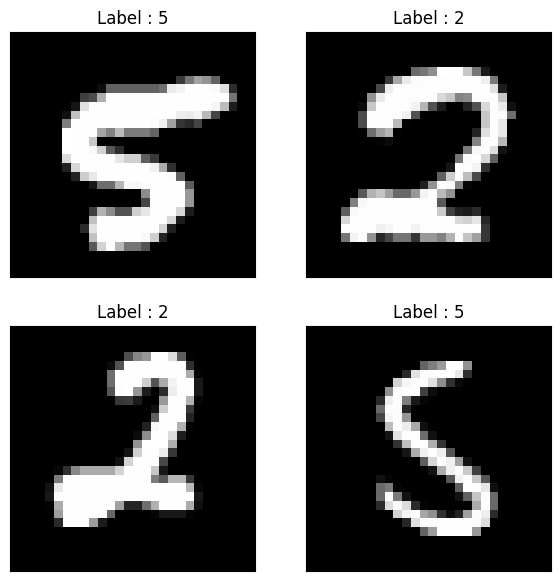

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255
y_train = y_train.astype(int)
y_test = y_test.astype(int)

print(f'{x_train.shape[0]} training examples\n{x_test.shape[0]} testing examples')

train_dataset = Dataset.from_tensor_slices((x_train, y_train))
test_dataset = Dataset.from_tensor_slices((x_test, y_test))

train_dataset = train_dataset.batch(64)
test_dataset = test_dataset.batch(64)

utils.show_samples(x_train, y_train)

## Back propagation model

For comparison with the Forward-Foward algorithm

In [3]:
clf = Sequential([InputLayer(input_shape=(28, 28)),
                  Flatten(),
                  Dense(10, activation='softmax')])
clf.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = clf.fit(train_dataset, epochs=100, verbose=1)

Epoch 1/100
938/938 [==============================] - 2s 1ms/step - loss: 0.5522 - accuracy: 0.8619
Epoch 2/100
938/938 [==============================] - 1s 1ms/step - loss: 0.3302 - accuracy: 0.9080
Epoch 3/100
938/938 [==============================] - 1s 1ms/step - loss: 0.3009 - accuracy: 0.9160
Epoch 4/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2869 - accuracy: 0.9196
Epoch 5/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2782 - accuracy: 0.9224
Epoch 6/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2722 - accuracy: 0.9241
Epoch 7/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2676 - accuracy: 0.9254
Epoch 8/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2640 - accuracy: 0.9263
Epoch 9/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2610 - accuracy: 0.9273
Epoch 10/100
938/938 [==============================] - 1s 1ms/step - loss: 0.2585 - accura

## Evaluation of the back propagation model

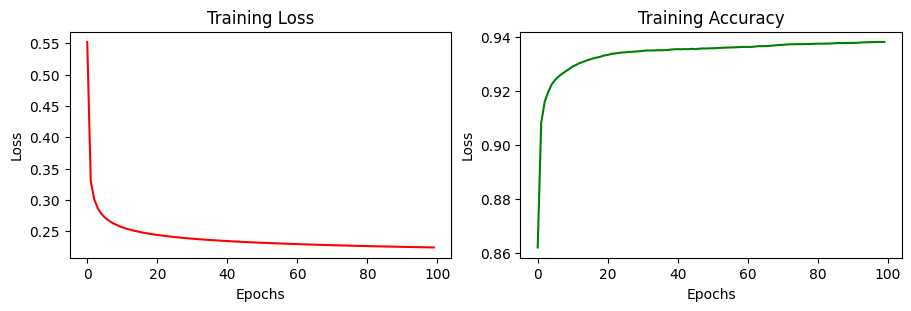

In [4]:
utils.plot_history(history.history)

157/157 [==============================] - 0s 1ms/step
 Accuracy = 92.46%


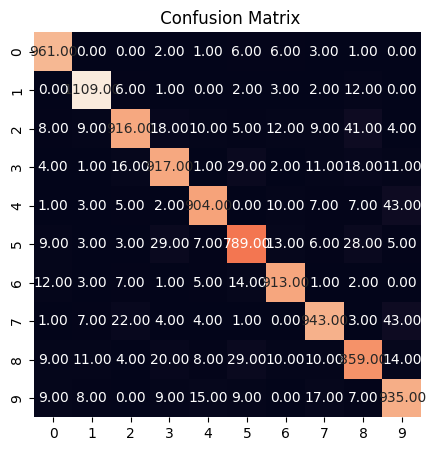

In [5]:
preds = clf.predict(test_dataset, verbose=1)
pred_labels = np.argmax(preds, axis=1)
utils.evaluate(y_test, pred_labels, figsize=5)

Look at the top four misclassified examples

Predicted: 9 Actual: 7


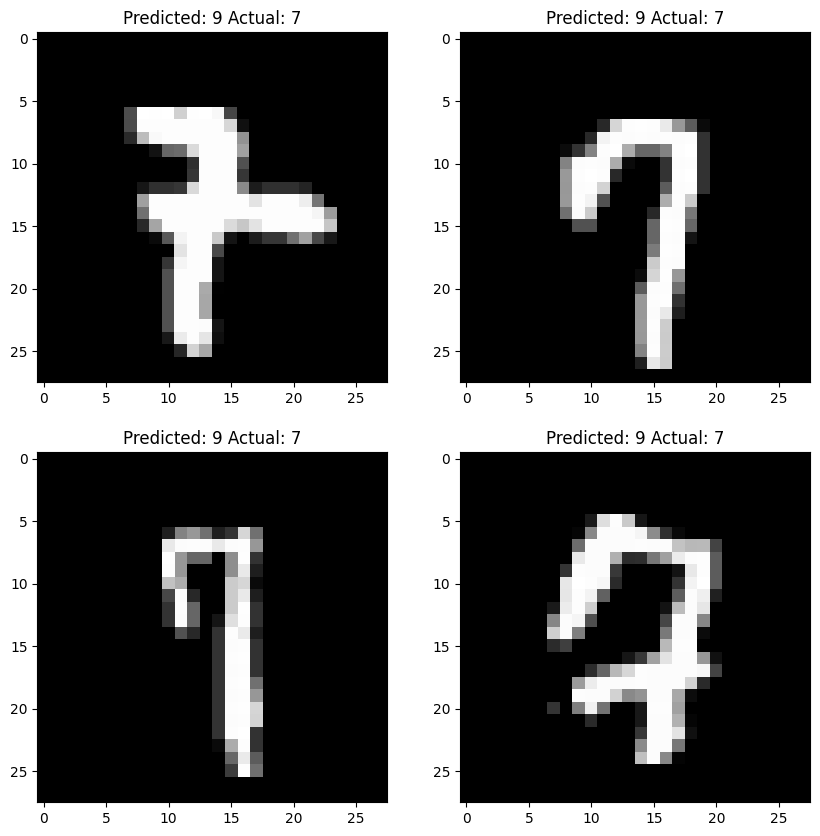

Predicted: 9 Actual: 4


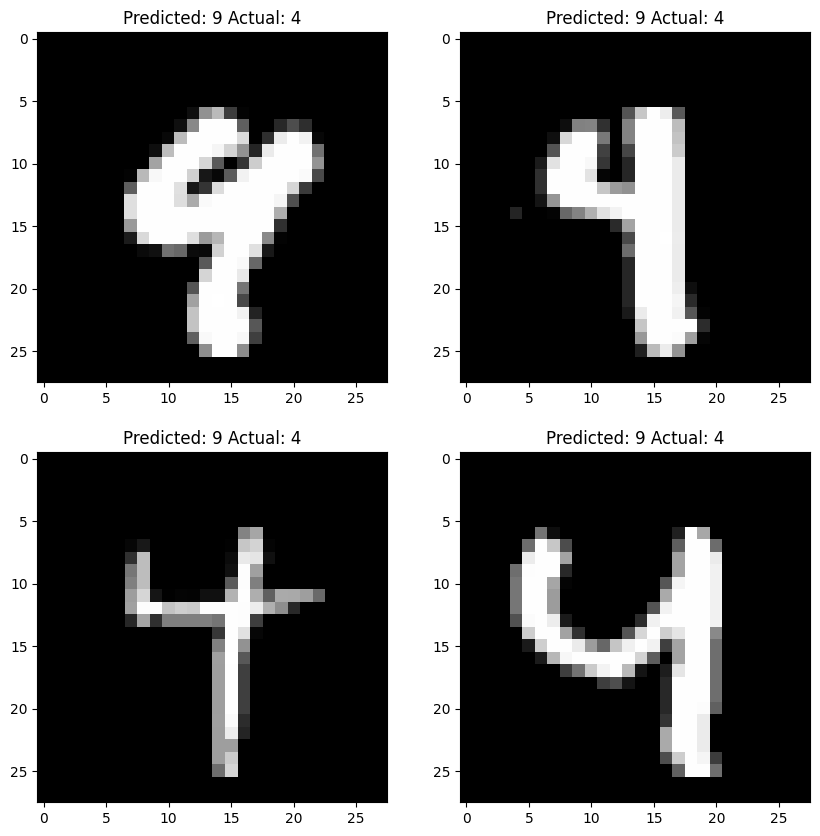

Predicted: 8 Actual: 2


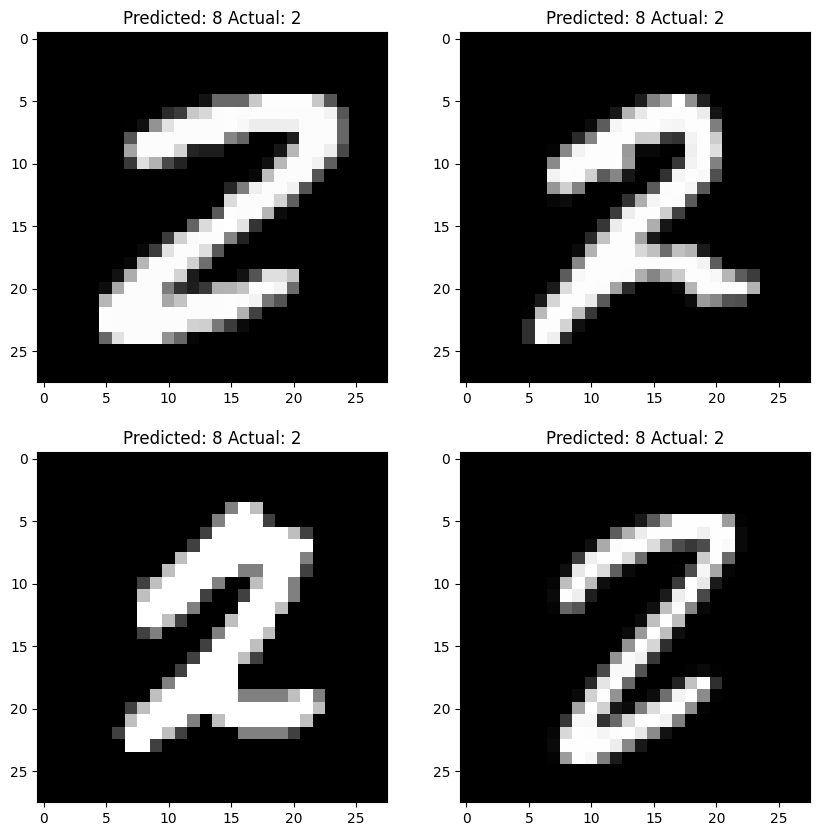

Predicted: 5 Actual: 8


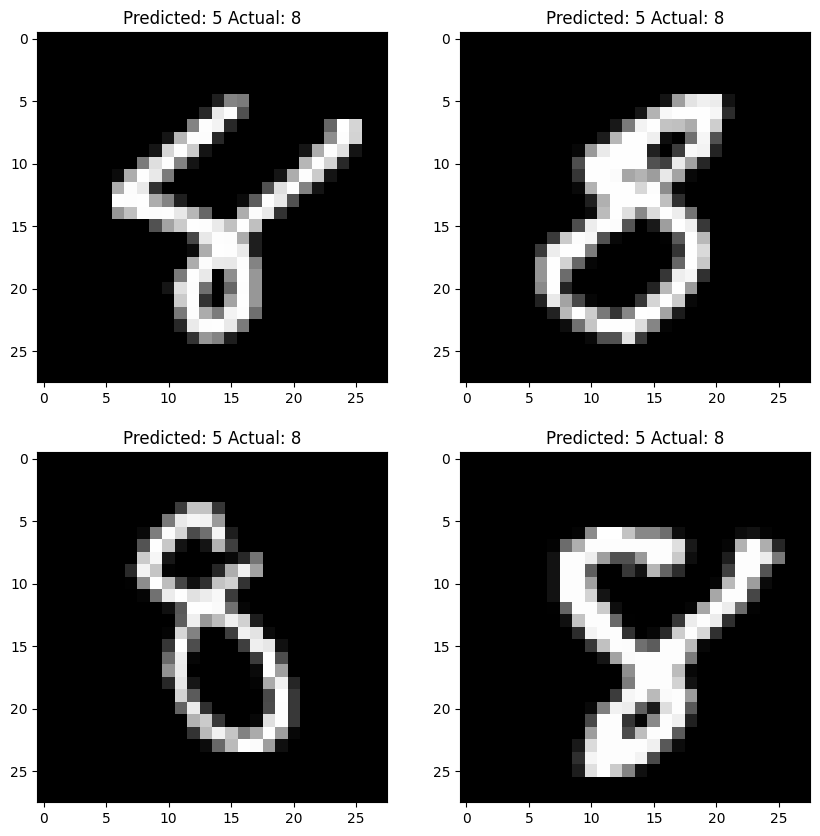

In [6]:
y_hat = np.squeeze(pred_labels)
misses_df, top_errors = utils.get_worst(y_hat, y_test, 4)

data = (x_test, y_hat, y_test)

for predicted, actual in top_errors.index.tolist():
    print(f'Predicted: {predicted} Actual: {actual}')
    utils.compare(predicted, actual, data, misses_df)

## Build and train the Forward-Foward model!

In [7]:
model = FFNetwork([784, 10], iterations=1)

model.compile(
    optimizer=Adam(learning_rate=0.03),
    loss="mse",
    jit_compile=True,
    metrics=[Mean()],
)

In [8]:
history = model.fit(train_dataset, epochs=100, verbose=1)

Epoch 1/100
Training layer 1 now : 
Training layer 1 now : 
938/938 [==============================] - 5s 3ms/step - FinalLoss: 0.6925
Epoch 2/100
938/938 [==============================] - 2s 3ms/step - FinalLoss: 0.5764
Epoch 3/100
938/938 [==============================] - 2s 3ms/step - FinalLoss: 0.5135
Epoch 4/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4807
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4604
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4470
Epoch 7/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4365
Epoch 8/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4283
Epoch 9/100
938/938 [==============================] - 2s 3ms/step - FinalLoss: 0.4218
Epoch 10/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 0.4163
Epoch 11/100
938/938 [==============================] - 3s 3ms/step - FinalLoss: 

## Model Evaluation

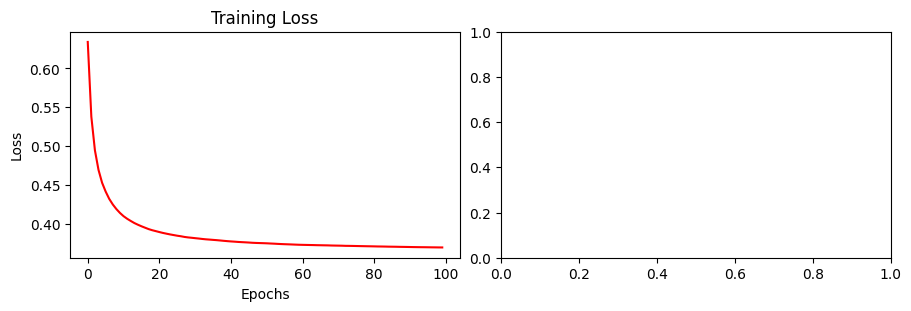

In [9]:
hist = {'loss': history.history['FinalLoss']}
utils.plot_history(hist)

 Accuracy = 81.20%


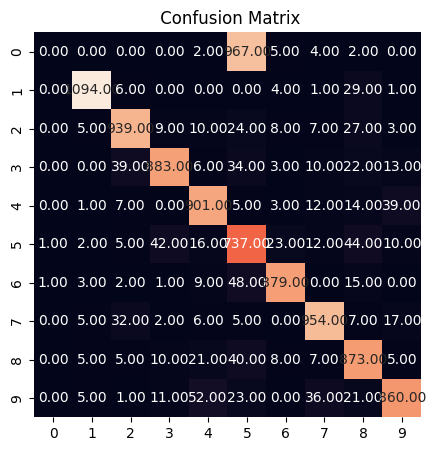

In [10]:
preds = model.predict(tf.convert_to_tensor(x_test))
preds = preds.reshape((preds.shape[0], preds.shape[1]))
utils.evaluate(y_test, preds, figsize=5)

### Looking at the errors

We can compare the predicted and actual labels for the top four misclassified examples.

Predicted: 5 Actual: 0


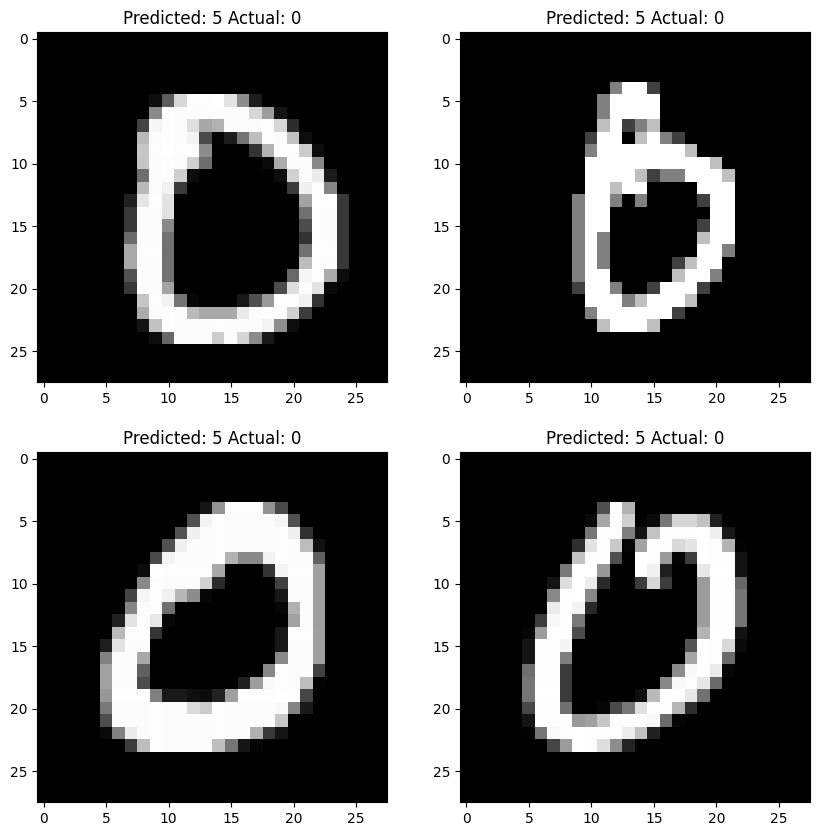

Predicted: 4 Actual: 9


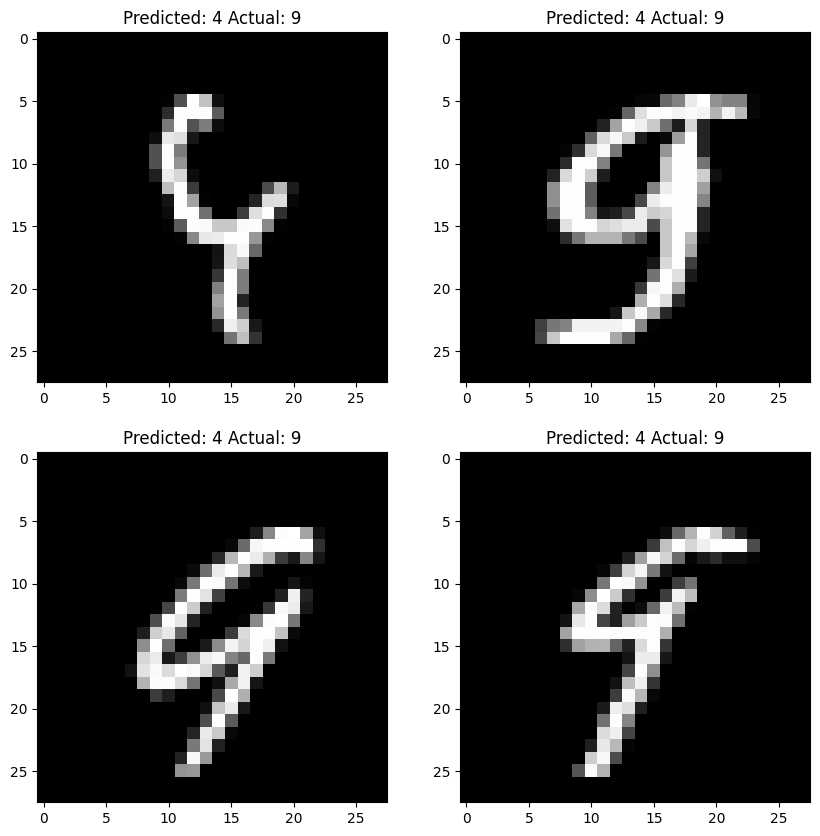

Predicted: 5 Actual: 6


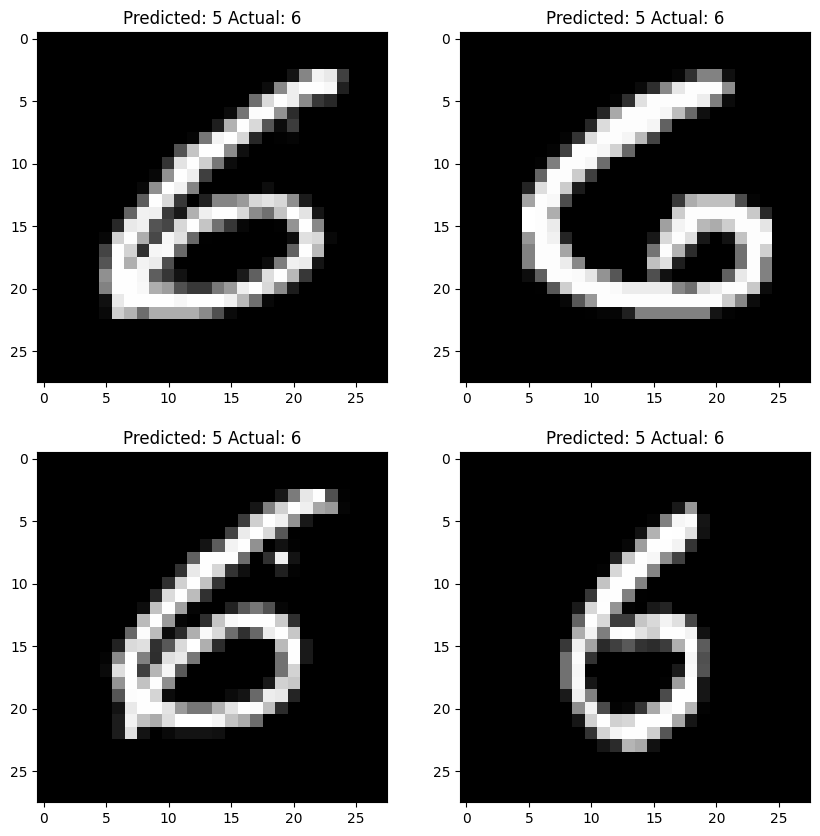

Predicted: 8 Actual: 5


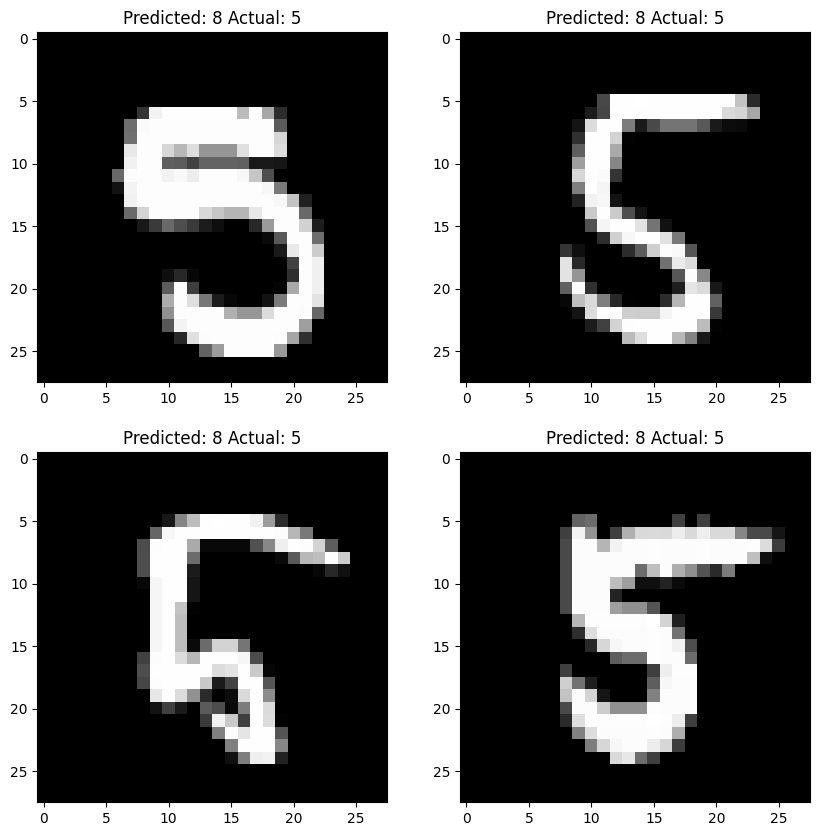

In [11]:
y_hat = np.squeeze(preds)
misses_df, top_errors = utils.get_worst(y_hat, y_test, 4)

data = (x_test, y_hat, y_test)

for predicted, actual in top_errors.index.tolist():
    print(f'Predicted: {predicted} Actual: {actual}')
    utils.compare(predicted, actual, data, misses_df)
